**LDA** **(short for Latent Dirichlet Allocation**) is an unsupervised machine-learning model that takes documents as input and finds topics as output. The model also says in what percentage each document talks about each topic.

# **Important libraries**

In [1]:
import sys
import re, numpy as np, pandas as pd
from pprint import pprint
from nltk.stem.wordnet import WordNetLemmatizer

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import spacy
import numpy as np
import tqdm


import nltk
nltk.download('stopwords')
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Read Data**

In [2]:
df = pd.read_csv('/content/Pubmed5k.csv')
print(df.shape)
df.head()

(4999, 3)


,ArticleID,Title,Abstract
0,34153941,Stable Coordination Variability in Overground ...,Coordination variability (CV) is commonly anal...
1,34153942,Weak Hip Strength Increases Dynamic Knee Valgu...,Clinical Scenario: Dynamic knee valgus (DKV) i...
2,34153964,Current and Future Projections of Amyotrophic ...,Various methodologies have been reported to as...
3,34153968,Disparities between Asian and Non-Asian Thromb...,As outcomes for acute ischemic stroke (AIS) va...
4,34153978,Maternal Factors Predicting Loss to Follow-Up ...,Because hearing loss in children can result in...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleID  4999 non-null   int64 
 1   Title      4999 non-null   object
 2   Abstract   4999 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


In [ ]:
from lxml import html
import requests


df = pd.read_csv('Pubmed5k1.csv')
#df = df.drop(columns = ["Abstract","Title"])

headers= {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36"}
lst = []
for index, row in df.iterrows():
    x= row['ArticleID']
    page = requests.get('https://pubmed.ncbi.nlm.nih.gov/{}'.format(x), headers=headers)
    tree = html.fromstring(page.content)  
    buyers = tree.xpath('/html/body/div[5]/main/div[2]/p/text()')
    lst.append(buyers)
    print(buyers)
import numpy as np
df['Keywords'] = np.array(lst)
df.to_csv('1.csv',index=False)

In [13]:
df = pd.read_csv('/content/Keywords.csv', encoding='cp1252',on_bad_lines='skip')

In [14]:
df.head(10)

,ArticleID,Keywords
0,34153941,joint coupling reliability segment coupling...
1,34153942,anterior cruciate ligament (ACL) injury prev...
2,34153964,Administrative claims Amyotrophic lateral sc...
3,34153968,Acute ischemic stroke Clinical trial Outcom...
4,34153978,WIC hearing screening maternal factors new...
5,34153979,Cultural adaptation Health disparities Phys...
6,34153980,ANCA calcineurin inhibitors lupus nephritis...
7,34153982,Dickkopf 3 albuminuria chronic kidney disea...
8,34153983,ESRD IgA nephropathy glomerulonephritis hy...
9,34153984,


# **Clean Data**

In [15]:
def clean_data (df: pd.DataFrame):

  #combine the ['Title', 'Abstract'] columns to one column
  df = df.drop(columns = ["ArticleID"]) # drop unused columns
  df["Keywords"].dropna()
  df['Keywords'] = df['Keywords'].map(lambda x: re.sub('[,\.!?%]\(.*?\)', '', x)) # remove punctuation
  df['Keywords'] = df['Keywords'].map(lambda x: x.lower())  # to lowercase
  df['Keywords'] = df['Keywords'].map(lambda x: re.sub('[~^0-9]', '', x)) #remove numbers

  corpus = df.values.tolist() # Convert to list
  corpus = [re.sub('\s+', ' ', str(sent)) for sent in corpus] # Remove new line characters
  return corpus


# call function clean_data 

data = clean_data(df)

In [16]:
data[1:5]

["[' anterior cruciate ligament (acl) injury prevention rehabilitation strengthening. ']",
 "[' administrative claims amyotrophic lateral sclerosis big data analytics clinical neurology future projections. ']",
 "[' acute ischemic stroke clinical trial outcome thrombolysis. ']",
 "[' wic hearing screening maternal factors newborn obesity. ']"]

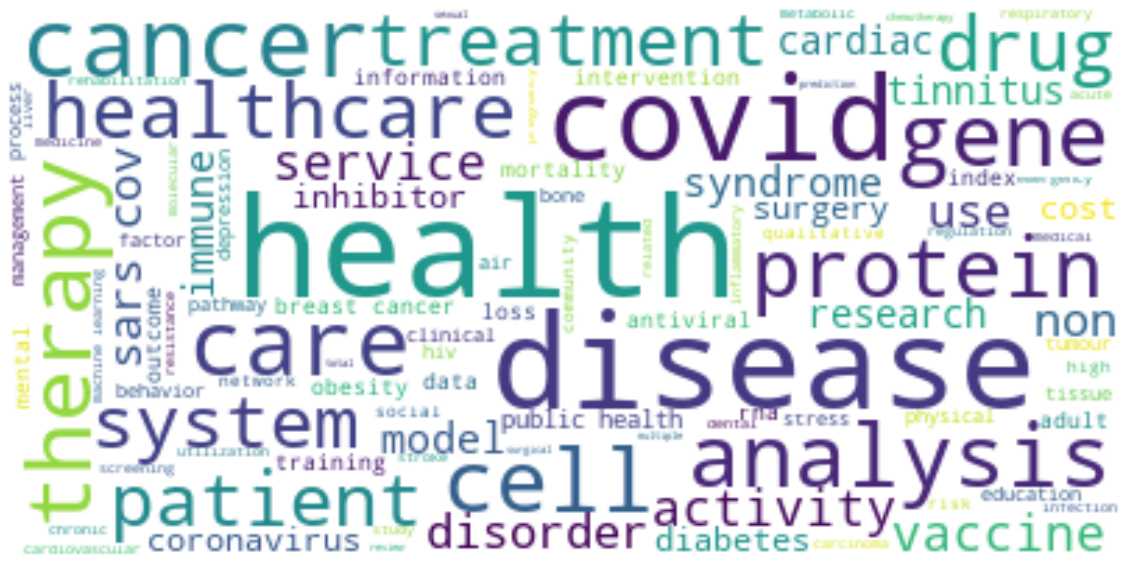

In [17]:
from wordcloud import WordCloud

text = " ".join(cat for cat in data)

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Data preprocessing**

In [18]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [19]:
# Apply Preprocessing on the Corpus
# lemmatization
lemma = WordNetLemmatizer()
import string
def Preprocessing(doc):
    # split into words and remove any stop words present  
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop_words])
    exclude = set(string.punctuation)
    # remove any stop words present
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)  
    
    # remove punctuations + normalize the text
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())  
    return normalized

# clean data stored in a new list
lemma_corpus = [Preprocessing(doc).split() for doc in data] 

In [20]:
lemma_corpus[0]

['joint', 'coupling', 'reliability', 'segment', 'coupling', 'vector', 'coding']

**Bigrams**

In [21]:
# Build the bigram 
bigram = gensim.models.Phrases(lemma_corpus, min_count=5, threshold=100) # higher threshold fewer phrases.
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
# Form Bigrams and trigrams
data_words_bigrams = make_bigrams(lemma_corpus)


**Dictionary and Corpus**

In [22]:
# Creating the term dictionary of our courpus that is of all the words (Sepcific to Genism syntax perspective), 
# where every unique term is assigned an index. 

dict_ = corpora.Dictionary(data_words_bigrams)

print(dict_)

Dictionary(2183 unique tokens: ['coding', 'coupling', 'joint', 'reliability', 'segment']...)


In [23]:
# Converting list of documents (corpus) into Document Term Matrix using the dictionary 
doc_term_matrix = [dict_.doc2bow(i) for i in data_words_bigrams]
doc_term_matrix


[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1)],
 [(6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)],
 [(14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1)],
 [(19, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1)],
 [(32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1)],
 [(39, 1), (40, 1), (41, 1), (42, 1), (43, 2), (44, 1), (45, 1), (46, 1)],
 [(47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1)],
 [(54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1)],
 [(62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1)],
 [],
 [],
 [(57, 1),
  (59, 1),
  (60, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 2)],
 [(75, 1), (76, 1), (77, 1), (78, 1)],
 [(19, 1), (79, 1), (80, 1), (81, 2), (82, 2), (83, 1), (84, 1)],
 [(85, 1), (86, 1), (87, 1), (88, 1), (89, 1)],
 [(17, 1),
  (20, 3),
  (82, 1),
  (90, 1),
  (91, 1),
  (92, 1),


# Model



In [24]:
Lda = gensim.models.ldamodel.LdaModel
lda_model = Lda(corpus=doc_term_matrix,
                                           id2word=dict_,
                                           num_topics=6, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [25]:
# Prints the topics with the indexes: 0,1,2 :

lda_model.print_topics()

# we need to manually check whethere the topics are different from one another or not

[(0,
  '0.040*"analysis" + 0.020*"adult" + 0.014*"coronavirus" + 0.014*"group" + 0.013*"method" + 0.011*"growth" + 0.011*"behavior" + 0.010*"sarscov" + 0.009*"sequencing" + 0.009*"construction"'),
 (1,
  '0.055*"health" + 0.022*"social" + 0.020*"care" + 0.014*"information" + 0.014*"healthcare" + 0.013*"drug" + 0.011*"disorder" + 0.010*"public" + 0.010*"intervention" + 0.010*"suicide"'),
 (2,
  '0.055*"cancer" + 0.021*"older" + 0.020*"model" + 0.015*"cell" + 0.013*"breast" + 0.012*"pathway" + 0.011*"mining" + 0.011*"pain" + 0.011*"profile" + 0.011*"personality"'),
 (3,
  '0.047*"disease" + 0.020*"loss" + 0.019*"system" + 0.018*"risk" + 0.017*"vaccine" + 0.017*"data" + 0.013*"vascular" + 0.012*"factor" + 0.012*"chronic" + 0.012*"respiratory"'),
 (4,
  '0.019*"therapy" + 0.014*"diabetes" + 0.013*"obesity" + 0.013*"protein" + 0.013*"review" + 0.011*"utilization" + 0.009*"water" + 0.009*"total" + 0.009*"control" + 0.009*"liver"'),
 (5,
  '0.054*"covid" + 0.023*"cost" + 0.020*"patient" + 0.0

**Compute Coherence Score**

In [26]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=dict_, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.6151594632098804


**Hperparameter Tuning**

In [27]:
def tune_param(corpus, dictionary,k,a):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dict_,
                                           num_topics=k, 
                                           
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                          )
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=dict_, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [28]:
'''
topics_range = range(5, 15, 1)
alpha = list(np.arange(0.01, 1, 0.5))

model_results = {
                 'Num_topics':[],
                 'Alpha': [],
                 'Coherence': []
                }

pbar = tqdm.tqdm(total=(len(alpha)*len(topics_range)))


for k in topics_range:
  for a in alpha:

      cv = tune_param(doc_term_matrix, dict_,k=k, a=a)
      model_results['Num_topics'].append(k)
      model_results['Alpha'].append(a)
      model_results['Coherence'].append(cv)
      pbar.update(1)
                    
model_results    
'''           


"\ntopics_range = range(5, 15, 1)\nalpha = list(np.arange(0.01, 1, 0.5))\n\nmodel_results = {\n                 'Num_topics':[],\n                 'Alpha': [],\n                 'Coherence': []\n                }\n\npbar = tqdm.tqdm(total=(len(alpha)*len(topics_range)))\n\n\nfor k in topics_range:\n  for a in alpha:\n\n      cv = tune_param(doc_term_matrix, dict_,k=k, a=a)\n      model_results['Num_topics'].append(k)\n      model_results['Alpha'].append(a)\n      model_results['Coherence'].append(cv)\n      pbar.update(1)\n                    \nmodel_results    \n"

**build final model after tuning hperparameters**

In [29]:
Lda = gensim.models.ldamodel.LdaModel
lda_model = Lda(corpus=doc_term_matrix,
                                           id2word=dict_,
                                           num_topics=9, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.01,
                                           per_word_topics=True)

In [30]:

lda_model.print_topics()


[(0,
  '0.050*"care" + 0.031*"drug" + 0.031*"patient" + 0.029*"older" + 0.018*"support" + 0.013*"skin" + 0.013*"tissue" + 0.012*"treatment" + 0.012*"organic" + 0.012*"betting"'),
 (1,
  '0.082*"health" + 0.033*"social" + 0.021*"healthcare" + 0.020*"depression" + 0.018*"loss" + 0.016*"public" + 0.016*"intervention" + 0.014*"determinant" + 0.013*"inequality" + 0.011*"program"'),
 (2,
  '0.064*"covid" + 0.055*"disease" + 0.046*"analysis" + 0.027*"cost" + 0.019*"vaccine" + 0.015*"vascular" + 0.014*"respiratory" + 0.014*"chronic" + 0.013*"behavior" + 0.010*"gene"'),
 (3,
  '0.028*"system" + 0.026*"risk" + 0.024*"data" + 0.020*"coronavirus" + 0.018*"factor" + 0.018*"prediction" + 0.016*"growth" + 0.015*"postpartum" + 0.015*"sarscov" + 0.014*"korean"'),
 (4,
  '0.037*"information" + 0.034*"therapy" + 0.023*"protein" + 0.022*"liver" + 0.022*"activity" + 0.020*"utilization" + 0.016*"total" + 0.016*"mining" + 0.015*"sequencing" + 0.014*"living"'),
 (5,
  '0.028*"adult" + 0.019*"method" + 0.017*"

In [31]:
# Compute Coherence Score for final model 
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=dict_, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.6229313965282509


In [32]:
print(lda_model.print_topics(num_topics=6, num_words=5))

# num_topics mean: how many topics want to extract 
# num_words: the number of words that want per topic

[(7, '0.073*"cancer" + 0.026*"model" + 0.020*"cell" + 0.017*"tuberculosis" + 0.017*"breast"'), (1, '0.082*"health" + 0.033*"social" + 0.021*"healthcare" + 0.020*"depression" + 0.018*"loss"'), (3, '0.028*"system" + 0.026*"risk" + 0.024*"data" + 0.020*"coronavirus" + 0.018*"factor"'), (8, '0.023*"diabetes" + 0.022*"obesity" + 0.020*"group" + 0.016*"physical" + 0.014*"stressor"'), (0, '0.050*"care" + 0.031*"drug" + 0.031*"patient" + 0.029*"older" + 0.018*"support"'), (5, '0.028*"adult" + 0.019*"method" + 0.017*"change" + 0.015*"control" + 0.014*"effect"')]


In [33]:
# printing the topic associations with the documents
count = 0
for i in lda_model[doc_term_matrix]:
    print("doc : ",count,i)
    count += 1

doc :  0 ([(0, 0.2100493), (4, 0.78007764)], [(0, [4, 0]), (1, [4, 0]), (2, [4]), (3, [4, 0]), (4, [4, 0]), (5, [0])], [(0, [(0, 0.11099717), (4, 0.8890028)]), (1, [(0, 0.14477636), (4, 1.8552235)]), (2, [(4, 0.99987924)]), (3, [(0, 0.11099717), (4, 0.8890028)]), (4, [(0, 0.11099717), (4, 0.8890028)]), (5, [(0, 0.9994266)])])
doc :  1 ([(1, 0.14301316), (4, 0.8483342)], [(6, [4, 1]), (7, [1]), (8, [4, 1]), (9, [4]), (10, [4, 1]), (11, [4]), (12, [4]), (13, [4, 1])], [(6, [(1, 0.036731288), (4, 0.9632687)]), (7, [(1, 0.9991576)]), (8, [(1, 0.036731288), (4, 0.9632687)]), (9, [(4, 0.9999992)]), (10, [(1, 0.036731288), (4, 0.9632687)]), (11, [(4, 0.99982107)]), (12, [(4, 0.9996148)]), (13, [(1, 0.036731288), (4, 0.9632687)])])
doc :  2 ([(3, 0.67294973), (5, 0.10657238), (6, 0.10793965), (8, 0.10840263)], [(14, [3]), (15, [3, 6, 8, 5]), (16, [3, 6, 8, 5]), (17, [3]), (18, [3]), (19, [5]), (20, [3]), (21, [3, 6, 8, 5]), (22, [6]), (23, [3, 6, 8, 5]), (24, [3, 6, 8, 5]), (25, [8])], [(14, [

**Visualization**

In [34]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 25.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=2d5b241e2761089d1883d5764499be966c95bd7b445e54e1a0f55e0c2f3c0e6c
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [35]:
%matplotlib inline
import pyLDAvis
from pyLDAvis.gensim_models import prepare

vis = prepare(topic_model=lda_model, corpus=doc_term_matrix, dictionary=dict_)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


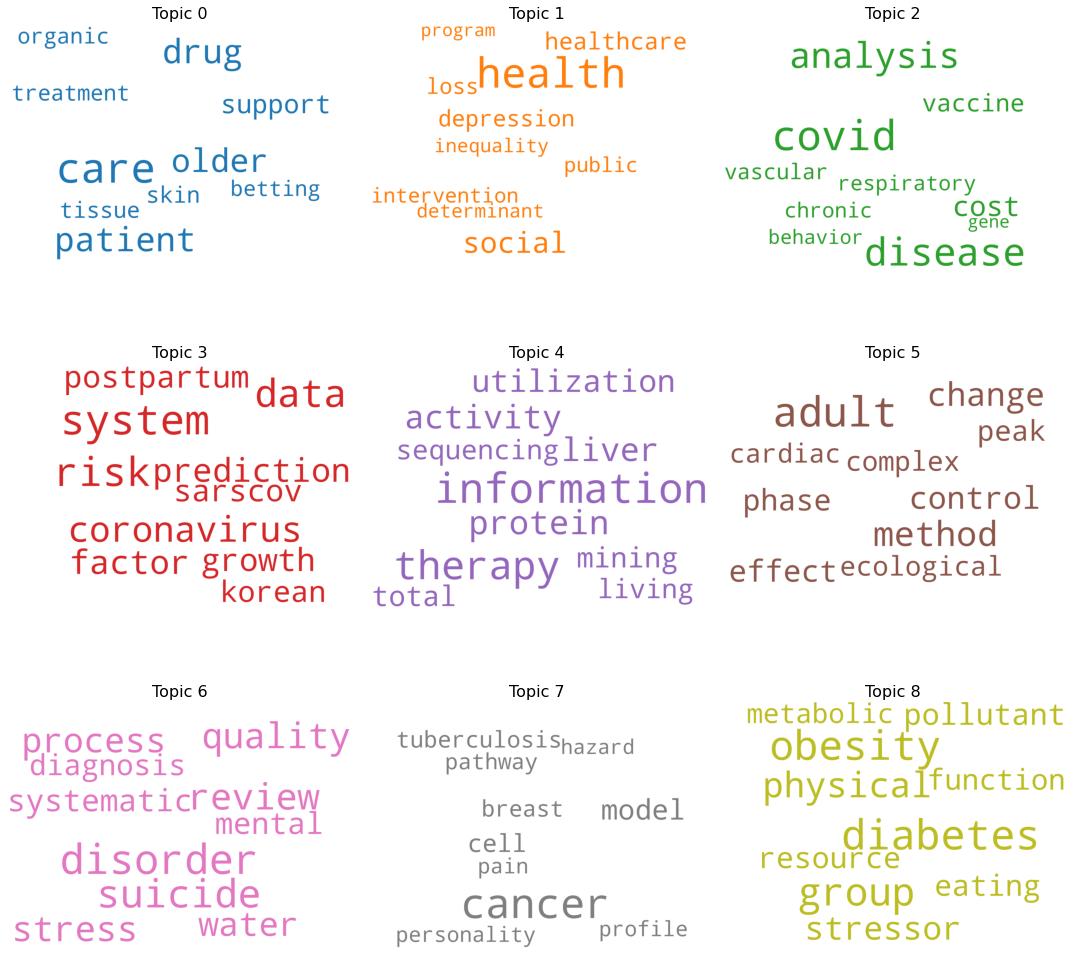

In [36]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# top 3 dominant topics in each sentence

In [37]:
def format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=data, n=1):

    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
       
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        topics = []
        percenges = []
        for j, (topic_num, prop_topic) in enumerate(row):
            if j < n:  # => dominant topic
                topics.append(int(topic_num))
                percenges.append(round(prop_topic,4))
            else:
                break

        if n == 1:
          sent_topics_df = sent_topics_df.append(pd.Series([topics[0],percenges[0]]), ignore_index=True)
        else:
          sent_topics_df = sent_topics_df.append(pd.Series([topics,percenges]), ignore_index=True)
          
    sent_topics_df.columns = ['Dominant_Topics', 'Perc_Contributions']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [38]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=data, n=3)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topics', 'Topic_Perc_Contribs','Text']

# Show
df_dominant_topic.head(10)


,Document_No,Dominant_Topics,Topic_Perc_Contribs,Text
0,0,"[4, 0]","[0.7802, 0.2099]",[' joint coupling reliability segment coupling...
1,1,"[4, 1]","[0.8483, 0.143]",[' anterior cruciate ligament (acl) injury pre...
2,2,"[3, 8, 6]","[0.6729, 0.1084, 0.108]",[' administrative claims amyotrophic lateral s...
3,3,"[6, 5, 1]","[0.6894, 0.153, 0.1491]",[' acute ischemic stroke clinical trial outcom...
4,4,"[3, 8, 6]","[0.6755, 0.1605, 0.1556]",[' wic hearing screening maternal factors newb...
5,5,"[1, 4, 8]","[0.6372, 0.1199, 0.1191]",[' cultural adaptation health disparities phys...
6,6,[4],[0.9887],[' anca calcineurin inhibitors lupus nephritis...
7,7,"[2, 4, 5]","[0.5396, 0.2947, 0.1583]",[' dickkopf albuminuria chronic kidney disease...
8,8,[1],[0.9869],[' esrd iga nephropathy glomerulonephritis hyp...
9,9,"[0, 1, 2]","[0.1111, 0.1111, 0.1111]",[' ']


In [39]:
#x = ([(0, 0.1776056), (1, 0.59326726), (2, 0.035423737), (3, 0.14120261), (5, 0.052071046)]             [(51, [0, 1, 3]), (73, [0, 1]), (89, [3]), (290, [3, 1, 5]), (332, [3, 5, 2]), (355, [1, 3, 0, 5]), (457, [0, 3, 1]), (542, [1, 0, 3, 2, 5]), (769, [1, 3, 0]), (837, [0]), (1051, [0, 5]), (1057, [0, 2, 1]), (1067, [1, 3, 0]), (1225, [0, 5, 2]), (1328, [3, 0, 5]), (1504, [3, 2, 5]), (1548, [5, 3, 2]), (1623, [1]), (1689, [1, 0]), (1735, [1, 0]), (1883, [1, 3, 0, 5, 2]), (2238, [1]), (3981, [0, 3, 5]), (4313, [3]), (5699, [5]), (5989, [5]), (6000, [1]), (6422, [1]), (6673, [5]), (7062, [1]), (10026, [0]), (14639, [2]), (15128, [2]), (15511, [1]), (15526, [1]), (16451, [1]), (19222, [0]), (52980, [1, 3]), (52981, [1, 3]), (52982, [1, 3]), (52983, [1, 3]), (52984, [1, 3]), (52985, [1]), (52986, [1])], [(51, [(0, 0.6723044), (1, 0.22593318), (3, 0.101762205)]), (73, [(0, 0.7721922), (1, 0.22738363)]), (89, [(3, 0.99999964)]), (290, [(1, 2.2442954), (3, 5.5652723), (5, 0.19043137)]), (332, [(2, 0.013732737), (3, 0.9576097), (5, 0.028657354)]), (355, [(0, 0.12957977), (1, 0.6872348), (3, 0.16335848), (5, 0.019826869)]), (457, [(0, 0.4847202), (1, 0.24522594), (3, 0.27005365)]), (542, [(0, 1.9192916), (1, 3.9353664), (2, 0.09645294), (3, 0.97930175), (5, 0.06958723)]), (769, [(0, 0.042645775), (1, 0.8096396), (3, 0.14211021)]), (837, [(0, 0.99998146)]), (1051, [(0, 0.90123796), (5, 0.09873948)]), (1057, [(0, 5.0798564), (1, 0.01203087), (2, 0.90811044)]), (1067, [(0, 0.03304564), (1, 0.5946829), (3, 0.36884695)]), (1225, [(0, 1.6871208), (2, 0.10706302), (5, 0.20580725)]), (1328, [(0, 0.43922585), (3, 0.46580154), (5, 0.09496945)]), (1504, [(2, 0.031010194), (3, 0.9520563), (5, 0.01693226)]), (1548, [(2, 0.1112429), (3, 0.8249149), (5, 1.063813)]), (1623, [(1, 0.99999976)]), (1689, [(0, 0.10730548), (1, 0.89269376)]), (1735, [(0, 0.22397208), (1, 0.7760274)]), (1883, [(0, 0.12565814), (1, 0.6554944), (2, 0.016682712), (3, 0.17070441), (5, 0.031460337)]), (2238, [(1, 1.9999988)]), (3981, [(0, 0.8941289), (3, 0.095068164), (5, 0.010798351)]), (4313, [(3, 0.9999402)]), (5699, [(5, 0.99996847)]), (5989, [(5, 0.99993044)]), (6000, [(1, 0.9999944)]), (6422, [(1, 0.99999976)]), (6673, [(5, 0.99941516)]), (7062, [(1, 0.9999979)]), (10026, [(0, 0.99802)]), (14639, [(2, 0.9997712)]), (15128, [(2, 0.99947613)]), (15511, [(1, 11.999991)]), (15526, [(1, 0.99999905)]), (16451, [(1, 1.9999967)]), (19222, [(0, 0.9999061)]), (52980, [(1, 4.986478), (3, 0.011340431)]), (52981, [(1, 0.9836727), (3, 0.013724958)]), (52982, [(1, 0.9836727), (3, 0.013724958)]), (52983, [(1, 0.9836727), (3, 0.013724958)]), (52984, [(1, 0.9836727), (3, 0.013724958)]), (52985, [(1, 6.9932218)]), (52986, [(1, 6.9932218)])])


In [40]:
#x = sorted(x[0], key=lambda xx: (xx[1]), reverse=True)